<a href="https://colab.research.google.com/github/Dichtael/TDS2324-TrafficAccidents/blob/Jazzy/CrashPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Car Crashes in a Given Satellite Image

# Identification of the Research Question

In this data analysis we want to build a car crash predictor, that predicts hotspots of car crashes in a satellite immage by outputting the same satellite image with heatmap like markings.

# Data Collection

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
data = pd.read_csv('/content/TrafficAccidentData_16-22.csv')
data.head()

,id,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,UKATEGORIE,...,IstRad,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstige,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84
0,0,1,0,53,120,2016,1,9,5,2,...,0,1,0,0,0.0,0,"606982,393999999970000","5954659,924999999800000","10,621659329000000","53,729614888000000"
1,1,1,0,57,10,2016,1,17,3,3,...,0,1,0,0,0.0,0,"574882,533000000050000","6011440,850999999800000","10,149175783000000","54,245452583999999"
2,2,1,0,62,8,2016,1,0,5,3,...,0,1,0,0,0.0,0,"599934,687500000000000","5964608,596199999600000","10,518094344000000","53,820402504999997"
3,3,1,0,3,0,2016,1,15,5,3,...,1,0,0,0,0.0,1,"610709,348699999970000","5968284,242300000000000","10,683020702000000","53,851243101000001"
4,4,1,0,55,28,2016,1,14,1,3,...,0,1,0,0,0.0,0,"605690,790400000060000","6009152,214700000400000","10,620986018000000","54,219458582000001"


In [16]:
data = data.drop(columns=["id"])
data.head()

,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,UKATEGORIE,UART,...,IstRad,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstige,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84
0,1,0,53,120,2016,1,9,5,2,8,...,0,1,0,0,0.0,0,"606982,393999999970000","5954659,924999999800000","10,621659329000000","53,729614888000000"
1,1,0,57,10,2016,1,17,3,3,1,...,0,1,0,0,0.0,0,"574882,533000000050000","6011440,850999999800000","10,149175783000000","54,245452583999999"
2,1,0,62,8,2016,1,0,5,3,9,...,0,1,0,0,0.0,0,"599934,687500000000000","5964608,596199999600000","10,518094344000000","53,820402504999997"
3,1,0,3,0,2016,1,15,5,3,5,...,1,0,0,0,0.0,1,"610709,348699999970000","5968284,242300000000000","10,683020702000000","53,851243101000001"
4,1,0,55,28,2016,1,14,1,3,8,...,0,1,0,0,0.0,0,"605690,790400000060000","6009152,214700000400000","10,620986018000000","54,219458582000001"


# Exploratory Data Analysis

In [24]:
print(data.isnull().sum())

ULAND                0
UREGBEZ              0
UKREIS               0
UGEMEINDE            0
UJAHR                0
UMONAT               0
USTUNDE              0
UWOCHENTAG           0
UKATEGORIE           0
UART                 0
UTYP1                0
ULICHTVERH     1554834
STRZUSTAND           0
IstRad               0
IstPKW               0
IstFuss              0
IstKrad              0
IstGkfz         195229
IstSonstige          0
LINREFX              0
LINREFY              0
XGCSWGS84            0
YGCSWGS84            0
dtype: int64


In [28]:
print(data.info)

<bound method DataFrame.info of          ULAND  UREGBEZ  UKREIS  UGEMEINDE  UJAHR  UMONAT  USTUNDE  \
0            1        0      53        120   2016       1        9   
1            1        0      57         10   2016       1       17   
2            1        0      62          8   2016       1        0   
3            1        0       3          0   2016       1       15   
4            1        0      55         28   2016       1       14   
...        ...      ...     ...        ...    ...     ...      ...   
1554829     16        0      53          0   2022      10       11   
1554830     16        0      55          0   2022      12       16   
1554831     16        0      51          0   2022      11        7   
1554832     16        0      63         66   2022      11        6   
1554833     16        0      53          0   2022       9       14   

         UWOCHENTAG  UKATEGORIE  UART  ...  IstRad  IstPKW  IstFuss  IstKrad  \
0                 5           2     8  ...     

**Histogram of Crashes over Years and Months**

In [35]:
# Group by year and month, and calculate the sum of crash counts
monthly_crashes = data.groupby(['UJAHR', 'UMONAT'])['UART'].count().reset_index()
monthly_crashes['crashes'] = monthly_crashes['UART']
monthly_crashes = monthly_crashes.drop(columns=['UART'])
monthly_crashes.head()

,UJAHR,UMONAT,crashes
0,2016,1,9917
1,2016,2,8980
2,2016,3,10140
3,2016,4,12207
4,2016,5,13880


In [32]:
monthly_crashes.crashes.sum()

1554834

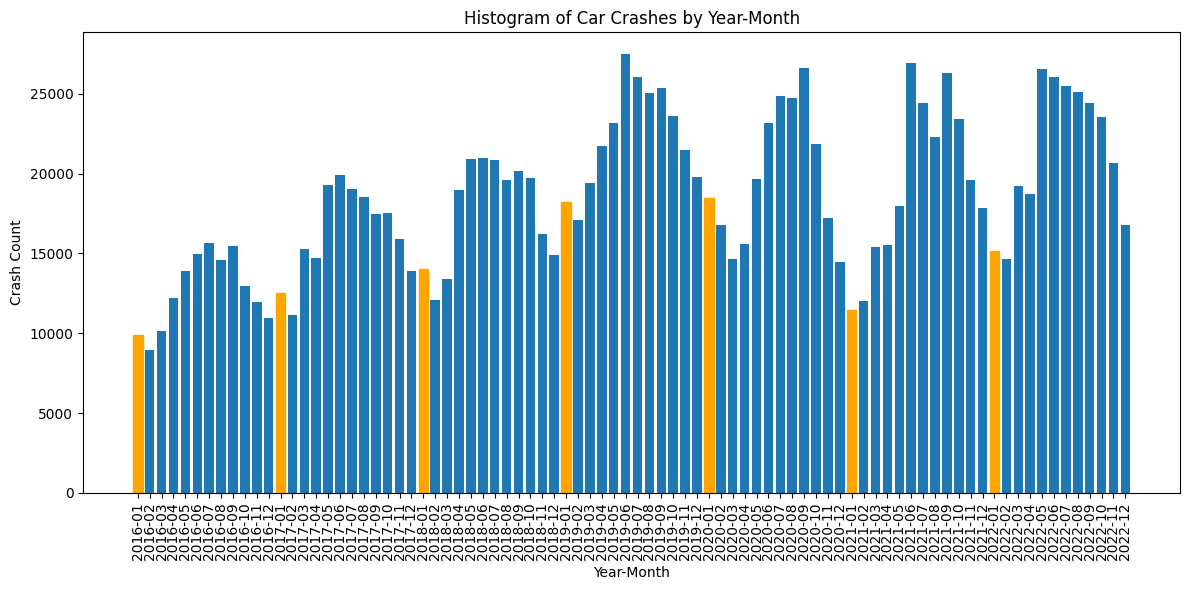

In [41]:
# Create the histogram
plt.figure(figsize=(12, 6))
bars = plt.bar(
    range(len(monthly_crashes)),
    monthly_crashes['crashes'],
    tick_label=monthly_crashes.apply(lambda x: f'{x["UJAHR"]}-{x["UMONAT"]:02d}', axis=1), # Format x-axis labels
)

# Mark January bars in orange
for i, month in enumerate(monthly_crashes['UMONAT']):
    if month == 1:  # January
        bars[i].set_color('orange')

plt.xlabel('Year-Month')
plt.ylabel('Crash Count')
plt.title('Histogram of Car Crashes by Year-Month')
plt.xticks(rotation=90) # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()



*   There appear to be peaks in the occurance of crashes in the months of june and may of every year except for 2020, where the highest amount of car crashes occured in sepember
*   In general the occurance of car crashes seems to rise throughout the displayed time period
*   It becomes more and more logarithmic with tendencies of skewness
*   Further, the traffic reduction resulting of pandemic indused quarantine and homeoffice policies can be observed in the plot between the end of 2020 and start 2021



**Distribution of Numerical Values**

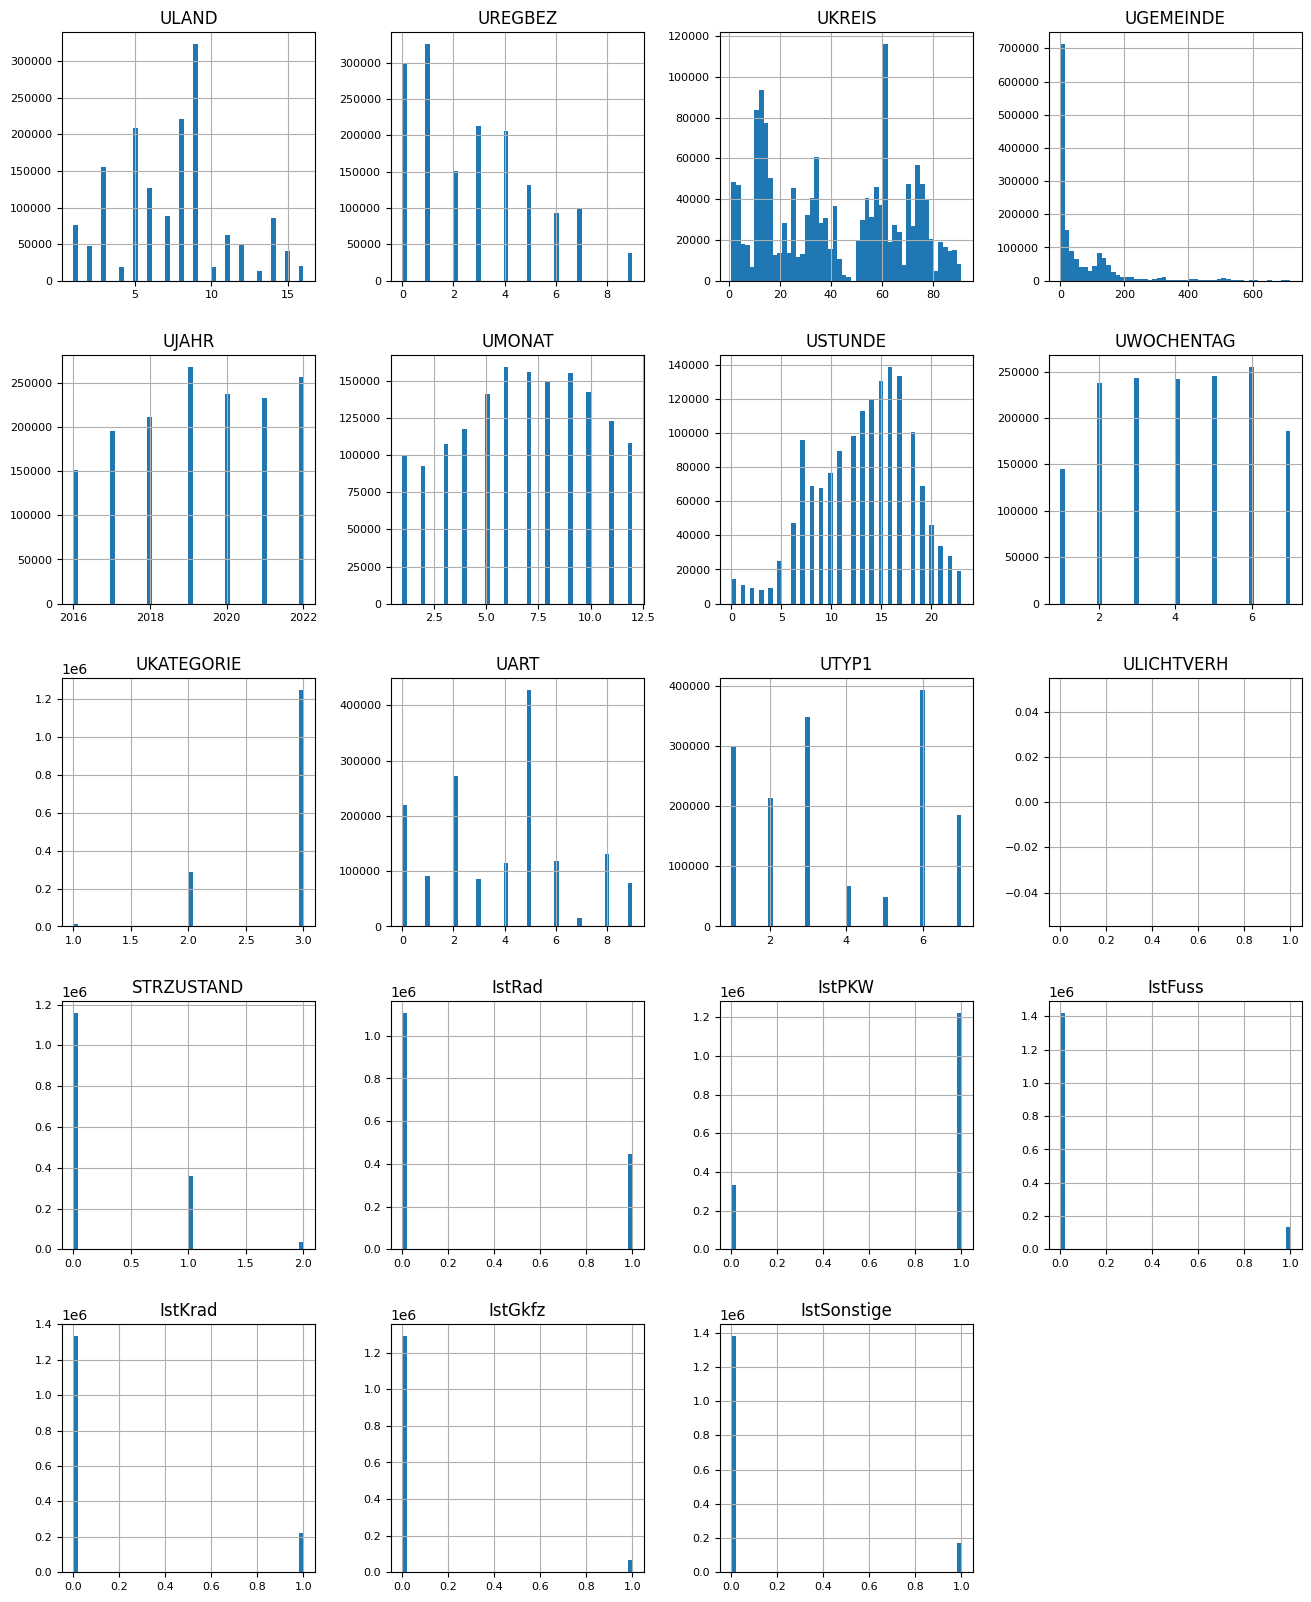

In [42]:
data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);



*   ULAND 9, UREGBEZ 2 und UKREIS 61(?) ist am häufigsten Unfallort
* UKATEGORIE 3, UART 5 und UTYP1 6 sind am häufigsten
*   Feiertagsverkehr (14-17) verursacht die meisten Unfälle
*   2019 und Juni sind das Jahr und Monat mit den meisten Unfällen



**Percentage of each Object of Transportation in Realtion to the Absolute Number of Car Crashes**

([<matplotlib.patches.Wedge at 0x7fb1a56b1360>,
 [Text(0.8947807144503713, 0.6398183125291766, 'Bike'),
  Text(-1.0773123701931793, 0.22225673674549057, 'Car'),
  Text(0.11954502329136628, -1.0934847906606964, 'Person'),
  Text(0.41674132755249294, -1.018001309385104, 'Gkfz?'),
  Text(0.7786117963070501, -0.7770223102662555, 'Kbike?'),
  Text(1.068515698148658, -0.2612933271438177, 'Others')])

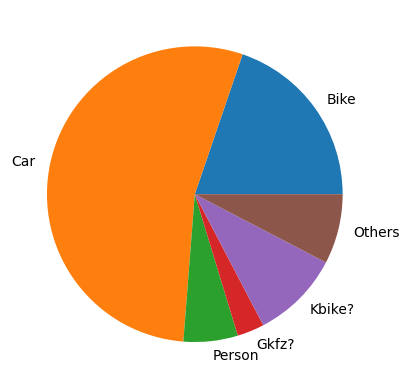

In [43]:
isBike = data.IstRad.sum()
isPkw = data.IstPKW.sum()
isPedestrian = data.IstFuss.sum()
isGkfz = data.IstGkfz.sum()
isKbike = data.IstKrad.sum()
isElse = data.IstSonstige.sum()

sum = isBike + isPkw + isPedestrian + isGkfz + isKbike + isElse
labels = ['Bike', 'Car', 'Person', 'Gkfz?', 'Kbike?', 'Others']
sizes = [isBike/sum, isPkw/sum, isPedestrian/sum, isGkfz/sum, isKbike/sum, isElse/sum]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)



*   Cars are involved in more than half of the total crashes
*   Bikes are involved in a little less than a fourth of the cases



# Data Analysis